In [1]:
# import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import matplotlib.dates as mdate
from matplotlib import rcParams
# import io
# import zipfile
# from pathlib import Path
from site_function import Kuntouling_mingyang,kuitonggou_jinfeng
from utils import save_data,save_figures
import matplotlib as mpl


In [2]:

mpl.font_manager.fontManager.addfont('字体/SIMSUN.ttf')
config = {
    "font.family":'serif',
    # "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SIMSUN'],
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False



In [3]:
phase_name = '魁通沟金风五六期'
raw_data_path='D:/1 新天\数字运营部 任务\金风手动分析/1124_0218/raw_data.csv'
pw_cur_path = 'D:/1 新天\数字运营部 任务\金风手动分析\理论功率曲线.xlsx'

In [5]:

site_dictionary = {'昆头岭明阳':Kuntouling_mingyang,'魁通沟金风四期':kuitonggou_jinfeng,'魁通沟金风五六期':kuitonggou_jinfeng,}
site_model = site_dictionary[phase_name]

if phase_name=='昆头岭明阳':
    # wtg_pn = '风机'
    # time_pn ='时间'
    # type_pn = '风机类型'

    # P_pn = '平均电网有功功率'
    # w_pn = '平均风速'
    # angle_pn='平均桨叶角度1a'
    # cabin_north_angle = '平均机舱对北角度'
    # wind_north_angle = '平均风向对北角度'
    # generator_speed_pn = '平均发电机转速1'
    pn_dictionary = {
        'phase_name':phase_name,
        'wtg_pn':'风机',
        'time_pn':'时间',
        'type_pn':'风机类型',
        'P_pn':'平均电网有功率',
        'w_pn':'平均风速',
        'angle_pn':'平均桨叶角度1a',
        'cabin_north_angle':'平均机舱对北角度',
        'wind_north_angle':'平均风向对北角度',
        'generator_speed_pn':'平均发电机转速1',
        'Large_components_temp' : ['平均齿轮箱前轴承温度','平均齿轮箱后轴承温度','平均发电机前轴承温度','平均发电机后轴承温度',
                    '平均齿轮箱主轴承温度','平均齿轮箱油温',],
        'generator_temp' : ['平均发电机绕组温度1','平均发电机绕组温度2','平均发电机绕组温度3','平均发电机绕组温度4','平均发电机绕组温度5','平均发电机绕组温度6'],
        'pitch_motor_temp' : ['平均桨叶电机1温度','平均桨叶电机2温度','平均桨叶电机3温度']
    }
if phase_name=='魁通沟金风四期':
    # wtg_pn = 'device_id'
    # time_pn ='data_time'
    # type_pn = '风机类型'

    # P_pn = '发电机有功功率'
    # w_pn = '风速'
    # angle_pn='桨叶片角度1'
    # inter_angle_pn = '机舱与风向夹角'
    # generator_speed_pn = '发电机转速瞬时值'
    # blade_dif_pn = 'blade_dif'
    pn_dictionary = {
        'phase_name':phase_name,
        'wtg_pn':'device_id',
        'time_pn':'data_time',
        'type_pn':'风机类型',
        'P_pn':'发电机有功功率',
        'w_pn':'风速',
        'angle_pn':'桨叶片角度1',
        'inter_angle_pn':'机舱与风向夹角',
        'generator_speed_pn':'发电机转速瞬时值',
        'blade_dif_pn':'blade_dif',
        'cabin_temp_pn':'舱内温度',
        'Large_components_temp' : ['发电机驱动端轴承温度', '发电机非驱动端轴承温度',],
        'generator_temp' : ['发电机绕组温度1','发电机绕组温度2', '发电机绕组温度3', '发电机绕组温度4',
        '发电机绕组温度5', '发电机绕组温度6', '发电机绕组温度7', '发电机绕组温度8', '发电机绕组温度9','发电机绕组温度10',
        '发电机绕组温度11', '发电机绕组温度12'],
        'pitch_motor_temp' : ['1号变桨电机温度', '2号变桨电机温度','3号变桨电机温度']
    }
if phase_name == '魁通沟金风五六期':
    pn_dictionary = {
        'phase_name':phase_name,
        'wtg_pn':'device_id',
        'time_pn':'data_time',
        'type_pn':'风机类型',
        'P_pn':'发电机有功功率',
        'w_pn':'风速',
        'angle_pn':'桨叶片角度1',
        'inter_angle_pn':'机舱与风向夹角',
        'generator_speed_pn':'发电机转速瞬时值',
        'blade_dif_pn':'blade_dif',
        'cabin_temp_pn':'舱内温度',
        'Large_components_temp' : ['发电机前轴承外圈温度','发电机后轴承外圈温度', '发电机前轴承内圈温度', '发电机后轴承内圈温度'],
        'generator_temp' : ['发电机绕组温度最大值',],
        'pitch_motor_temp' : ['1号变桨电机温度', '2号变桨电机温度','3号变桨电机温度']
    }
    
def load_data(url):
    df = pd.read_csv(url)
    return df

In [6]:
if raw_data_path is not None:
    raw_data = load_data(raw_data_path)
else:
    raw_data = load_data('D:/1 新天\数字运营部 任务\昆头岭手动分析/24年1月/raw_data.csv')
theory_pw_cur = pd.read_excel(pw_cur_path if pw_cur_path else 'pw_theory_cur\昆头岭明阳理论功率曲线.xlsx')


In [7]:
site_instance = site_model(raw_data,theory_pw_cur,**pn_dictionary)
site_instance.raw_data

,device_id,data_time,风机类型,发电机有功功率,风速,桨叶片角度1,机舱与风向夹角,blade_dif,发电机转速瞬时值,舱内温度,发电机前轴承外圈温度,发电机后轴承外圈温度,发电机前轴承内圈温度,发电机后轴承内圈温度,发电机绕组温度最大值,1号变桨电机温度,2号变桨电机温度,3号变桨电机温度
0,#149,2023-11-24 00:00:00,GW140_3400,3395.7788,9.4968,4.2581,-4.0894,6.48,11.9928,-15.7574,3.3333,8.4714,10.5375,13.5400,62.1000,8.7161,6.4710,7.4125
1,#149,2023-11-24 00:10:00,GW140_3400,3314.9557,9.1497,3.3835,357.1990,7.87,12.0060,-15.6894,3.6727,9.1312,11.8000,13.9875,61.6480,7.8464,5.5821,6.2852
2,#149,2023-11-24 00:20:00,GW140_3400,2593.6498,8.0541,1.1570,2.1370,3.08,11.7417,-15.5457,3.8667,9.9800,12.7167,14.6714,59.5840,3.3633,1.2000,1.6300
3,#149,2023-11-24 00:30:00,GW140_3400,1969.6574,6.5256,0.0975,351.0930,0.67,11.2267,-10.9178,3.9500,10.0286,12.3714,15.0714,55.7238,-3.0630,-4.4407,-4.4962
4,#149,2023-11-24 00:40:00,GW140_3400,1993.1667,6.6966,0.4460,356.2700,0.85,11.2181,-12.1536,3.8250,9.9500,11.9600,15.5250,55.4773,-4.4304,-5.5429,-5.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551049,#192,2024-02-18 23:10:00,GW140_3400,2346.1830,8.5433,0.0000,355.4680,0.00,9.7600,-2.9333,6.6000,12.5000,6.7000,12.9000,63.9000,13.3000,13.3000,14.5000
551050,#192,2024-02-18 23:20:00,GW140_3400,2394.3100,8.8411,0.4100,5.5400,0.00,10.1200,-5.2000,6.4000,12.3000,6.6000,12.8000,63.3000,16.0000,14.1000,17.2000
551051,#192,2024-02-18 23:30:00,GW140_3400,2099.1350,8.4670,-0.0700,0.9270,0.00,10.9600,-5.3000,6.3000,12.2000,6.5000,12.7000,62.4000,12.0000,12.0000,12.8000
551052,#192,2024-02-18 23:40:00,GW140_3400,1799.8686,7.8140,-0.0100,1.2770,0.00,11.4900,-5.5000,6.2000,12.1000,6.4000,12.6429,60.9667,9.5000,9.5000,10.4000


原始数据(551054, 18)
有效风速段数据(519944, 21)
限功率点:(71903, 26)
   device_id           data_time      风速  V_bin    发电机有功功率        P_bin  \
0      #149 2023-11-25 00:20:00  7.9286    8.0  1753.5512  1801.353250   
1      #149 2023-11-25 00:30:00  8.5269    8.5  2131.9650  2111.851315   
2      #149 2023-11-25 00:40:00  8.3682    8.5  2012.2903  2108.877033   
3      #149 2023-11-25 01:10:00  9.4549    9.5  2836.7015  2877.488751   
4      #149 2023-11-25 01:20:00  9.3299    9.5  2749.7119  2902.866358   

   桨叶片角度1       gap  blade_dif  
0  3.0627  0.166426       4.32  
1  0.4000  0.182087       0.00  
2  5.2240  0.183239       7.87  
3  3.2841  0.152932       4.64  
4  3.8029  0.145462       5.64  
非限功率点：(448041, 26)
功率小于0点:(69514, 26)
正常发电点:(378527, 26)


2024-02-20 15:50:11.787 
  command:

    streamlit run d:\Anaconda\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


原始数据、剔除限电后、剔除功率小于等于0后的数据大小分别为(551054, 448041, 378527)


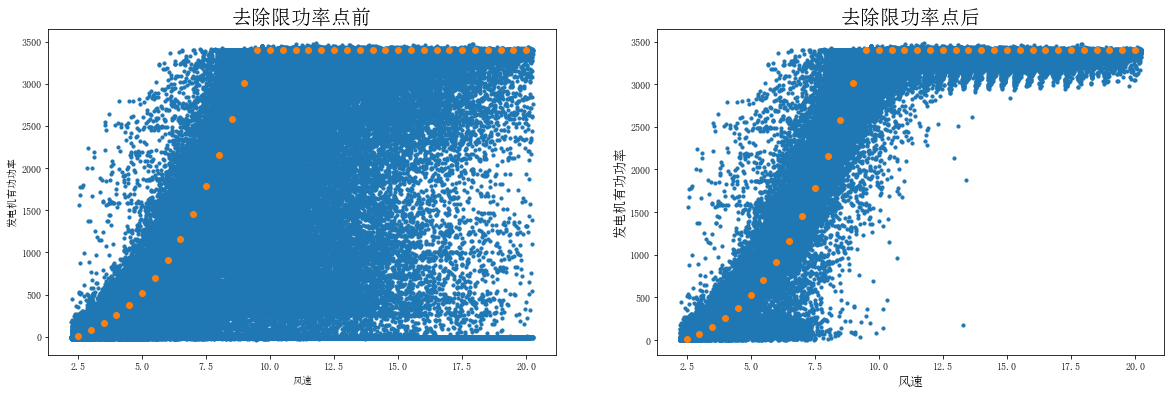

In [8]:
fig_limit_power,size_changing = site_instance.limit_power()
print(f'原始数据、剔除限电后、剔除功率小于等于0后的数据大小分别为{size_changing}')
fig_limit_power

In [9]:
torque_results_df,torque_fig_ls = site_instance.torque_speed_warning()

In [10]:
torque_results_df

,风机号,风机型号,斜率
0,#149,GW140_3400,13.408828
1,#150,GW140_3400,13.381433
2,#151,GW140_3400,13.319685
3,#152,GW140_3400,13.441492
4,#153,GW140_3400,13.398404
5,#154,GW140_3400,13.405532
6,#155,GW140_3400,13.460910
7,#156,GW140_3400,13.401126
8,#157,GW140_3400,13.352683
9,#158,GW140_3400,13.486769


In [11]:
yaw_result_df,yaw_angle_hist,yaw_result_list = site_instance.yaw_warning()
yaw_result_df

,风机号,风机型号,计数,K值最大夹角,频率最高夹角,差值,0°K值,最高K值,频率最高K值,最高K值-0°K值
0,#149,GW140_3400,8820,-7.0,0.0,7.0,0.9711,0.9847,0.9711,0.0136
1,#150,GW140_3400,8957,0.0,-4.0,4.0,0.9829,0.9829,0.9700,0.0000
2,#151,GW140_3400,8458,0.0,1.0,1.0,0.9777,0.9777,0.9666,0.0000
3,#152,GW140_3400,8625,-5.0,-3.0,2.0,0.9535,0.9618,0.9184,0.0084
4,#153,GW140_3400,8584,-7.0,-1.0,6.0,0.9585,0.9689,0.9580,0.0104
5,#154,GW140_3400,8544,-7.0,-1.0,6.0,0.9582,0.9685,0.9487,0.0103
6,#155,GW140_3400,8484,-5.0,0.0,5.0,0.9474,0.9546,0.9474,0.0072
7,#156,GW140_3400,8823,-7.0,0.0,7.0,0.9787,1.0037,0.9787,0.0250
8,#157,GW140_3400,8412,-2.0,-3.0,1.0,0.9798,0.9912,0.9825,0.0114
9,#158,GW140_3400,8403,-4.0,0.0,4.0,0.9583,0.9628,0.9583,0.0045


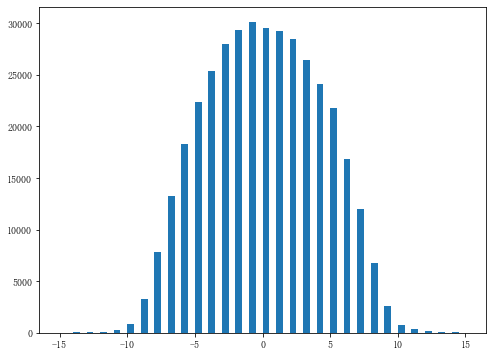

In [12]:
yaw_angle_hist

In [13]:
blade_result_df,fig_ls_blade,fig_ls_blade_time,fig_ls_blade_type = site_instance.blade_warning()
blade_result_df

,风机号,风机型号,桨叶角度最小值
0,#149,GW140_3400,-0.1900
1,#150,GW140_3400,-0.1800
2,#151,GW140_3400,-0.2000
3,#152,GW140_3400,-0.1900
4,#153,GW140_3400,-0.2200
5,#154,GW140_3400,-0.2700
6,#155,GW140_3400,-0.2300
7,#156,GW140_3400,-0.1700
8,#157,GW140_3400,-0.2300
9,#158,GW140_3400,-0.1800


In [14]:
site_instance.full_time()

In [15]:

all_data = site_instance.get_all_data()
site_instance.set_error_threshold()
site_instance.all_data

,device_id,data_time,风机类型,发电机有功功率,风速,桨叶片角度1,机舱与风向夹角,blade_dif,发电机转速瞬时值,舱内温度,...,3号变桨电机温度,V_bin,P_bin,full_time,pw_diff,发电机前轴承外圈温升(发电机前轴承外圈温度-舱内温度),发电机后轴承外圈温升(发电机后轴承外圈温度-舱内温度),发电机前轴承内圈温升(发电机前轴承内圈温度-舱内温度),发电机后轴承内圈温升(发电机后轴承内圈温度-舱内温度),发电机绕组温度最大值温升(发电机绕组温度最大值-舱内温度)
0,#149,2023-11-24 00:00:00,GW140_3400,3395.7788,9.4968,4.2581,-4.0894,6.48,11.9928,-15.7574,...,7.4125,9.5,3399.212637,0,4.2212,19.0907,24.2288,26.2949,29.2974,77.8574
1,#149,2023-11-24 00:10:00,GW140_3400,3314.9557,9.1497,3.3835,357.1990,7.87,12.0060,-15.6894,...,6.2852,9.0,3154.893427,10,85.0443,19.3621,24.8206,27.4894,29.6769,77.3374
2,#149,2023-11-24 00:20:00,GW140_3400,2593.6498,8.0541,1.1570,2.1370,3.08,11.7417,-15.5457,...,1.6300,8.0,2541.734857,20,806.3502,19.4124,25.5257,28.2624,30.2171,75.1297
3,#149,2023-11-24 00:30:00,GW140_3400,1969.6574,6.5256,0.0975,351.0930,0.67,11.2267,-10.9178,...,-4.4962,6.5,1946.567258,0,1430.3426,14.8678,20.9464,23.2892,25.9892,66.6416
4,#149,2023-11-24 00:40:00,GW140_3400,1993.1667,6.6966,0.4460,356.2700,0.85,11.2181,-12.1536,...,-5.7500,6.5,1822.722762,0,1406.8333,15.9786,22.1036,24.1136,27.6786,67.6309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12521,#192,2024-02-18 23:10:00,GW140_3400,2346.1830,8.5433,0.0000,355.4680,0.00,9.7600,-2.9333,...,14.5000,8.5,2310.690027,0,1053.8170,9.5333,15.4333,9.6333,15.8333,66.8333
12522,#192,2024-02-18 23:20:00,GW140_3400,2394.3100,8.8411,0.4100,5.5400,0.00,10.1200,-5.2000,...,17.2000,9.0,2525.742077,0,1005.6900,11.6000,17.5000,11.8000,18.0000,68.5000
12523,#192,2024-02-18 23:30:00,GW140_3400,2099.1350,8.4670,-0.0700,0.9270,0.00,10.9600,-5.3000,...,12.8000,8.5,2123.774822,0,1300.8650,11.6000,17.5000,11.8000,18.0000,67.7000
12524,#192,2024-02-18 23:40:00,GW140_3400,1799.8686,7.8140,-0.0100,1.2770,0.00,11.4900,-5.5000,...,10.4000,8.0,1931.481447,0,1600.1314,11.7000,17.6000,11.9000,18.1429,66.4667


In [16]:
site_instance.scene_df

,scene_name,abnormal_thre,warning_thre,error_thre,abnormal_thre_k
0,发电机绕组温度最大值,140,None,150,110
1,发电机前轴承外圈温度,70,None,80,100
2,发电机后轴承外圈温度,70,None,80,100
3,发电机前轴承内圈温度,80,None,90,100
4,发电机后轴承内圈温度,80,None,90,100


In [17]:
if_n=True
Large_components_fig = site_instance.gen_Large_components_temp(if_notation=if_n)

自动标注,数据最大值为：97.3，异常阈值：140
自动标注,数据最大值为：89.24340000000001，异常阈值：110
自动标注,数据最大值为：41.42，异常阈值：70
自动标注,数据最大值为：56.6244，异常阈值：100
自动标注,数据最大值为：45.0，异常阈值：70
自动标注,数据最大值为：60.4259，异常阈值：100
自动标注,数据最大值为：48.1，异常阈值：80
自动标注,数据最大值为：64.10589999999999，异常阈值：100
自动标注,数据最大值为：47.4，异常阈值：80
自动标注,数据最大值为：63.449，异常阈值：100


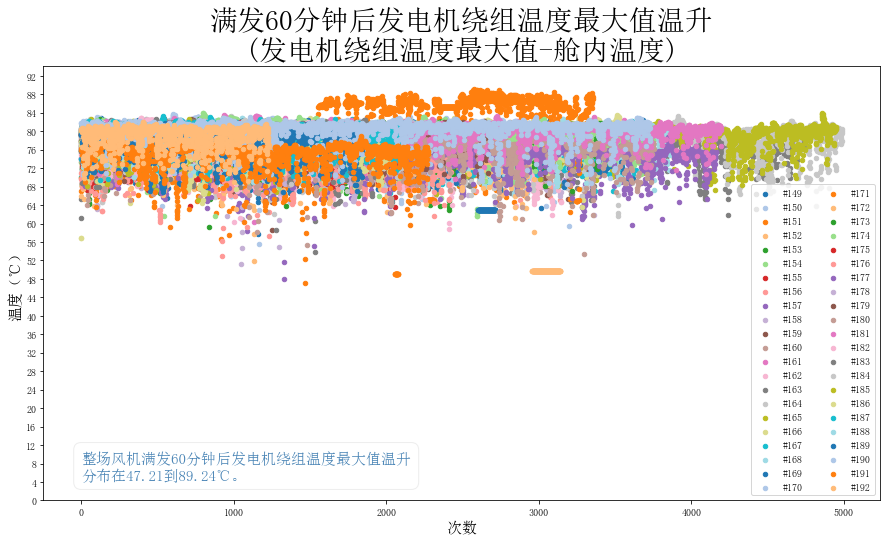

In [18]:
Large_components_fig[1]

In [19]:
site_instance.full_pw

,device_id,data_time,风机类型,发电机有功功率,风速,桨叶片角度1,机舱与风向夹角,blade_dif,发电机转速瞬时值,舱内温度,...,3号变桨电机温度,V_bin,P_bin,full_time,pw_diff,发电机前轴承外圈温升(发电机前轴承外圈温度-舱内温度),发电机后轴承外圈温升(发电机后轴承外圈温度-舱内温度),发电机前轴承内圈温升(发电机前轴承内圈温度-舱内温度),发电机后轴承内圈温升(发电机后轴承内圈温度-舱内温度),发电机绕组温度最大值温升(发电机绕组温度最大值-舱内温度)
0,#149,2023-11-24 02:00:00,GW140_3400,3119.4256,9.4594,3.7453,3.221,7.37,11.9719,-15.7529,...,6.0655,9.5,3159.764217,70,280.5744,19.5529,24.0154,26.7654,30.2196,77.4897
1,#149,2023-11-24 02:10:00,GW140_3400,3334.5969,9.8202,4.6066,2.143,8.58,12.0172,-15.9973,...,5.9345,10.0,3521.132304,80,65.4031,20.2598,24.8791,27.6840,31.0373,76.8640
2,#149,2023-11-24 02:20:00,GW140_3400,3395.2757,10.0992,5.4445,359.306,8.44,11.9800,-15.9594,...,6.6429,10.0,3296.204338,90,4.7243,20.1594,25.4844,28.1907,31.0261,77.9816
3,#149,2023-11-24 02:30:00,GW140_3400,3223.8395,10.0315,5.2459,1.449,8.94,11.9748,-15.8243,...,6.5310,10.0,3193.565145,100,176.1605,19.8743,25.3043,27.7576,30.8243,77.5698
4,#149,2023-11-24 02:40:00,GW140_3400,3202.6519,8.5899,2.3647,355.853,7.57,11.9828,-15.6636,...,6.1094,8.5,3103.145866,110,197.3481,20.0636,24.8436,27.3136,30.3136,76.7930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132430,#192,2024-02-18 15:50:00,GW140_3400,3170.4700,9.4700,8.7800,355.670,0.00,12.2100,-2.3000,...,36.5000,9.5,3200.696736,80,229.5300,12.2000,16.4000,11.9000,16.5000,78.8000
132431,#192,2024-02-18 16:00:00,GW140_3400,3217.2510,10.4300,1.9600,355.031,0.00,12.1750,-2.1000,...,40.4000,10.5,3282.463582,90,182.7490,11.9000,16.1000,11.6000,16.2000,80.7000
132432,#192,2024-02-18 16:10:00,GW140_3400,2770.4633,10.9850,4.7400,2.871,0.00,12.1750,-2.3667,...,38.0000,11.0,2781.827994,100,629.5367,12.1667,16.2667,12.8542,16.4667,78.4667
132433,#192,2024-02-18 16:20:00,GW140_3400,2476.4500,12.1650,8.6300,355.422,0.00,12.5600,-1.8000,...,37.1000,12.0,2377.042585,110,923.5500,11.8000,15.8000,13.6500,15.9000,77.1000


In [20]:
site_instance.generator_temp_ls

['发电机绕组温度最大值']

In [21]:
generator_temp_fig = site_instance.gen_generator_Temp()
pitch_motor_temp_fig = site_instance.gen_pitch_motor_Temp()

In [22]:
generator_temp_fig

[]

In [23]:
import pandas as pd
from docx import Document 
from docx.shared import Cm
import math
import io
from docx.oxml.ns import qn

class gen_document():
    def __init__(self,
                 instance,
                #  Large_components_temp_ls,
                #  generator_temp_ls,
                #  pitch_motor_temp_ls,
                 Large_component_fig_ls,
                 generator_temp_fig_ls,
                 pitch_motor_temp_fig_ls,
                 torque_fig_ls,
                 yaw_data,
                 blade_pw_fig_ls,
                 blade_time_fig_ls,
                 ):
        self.Large_components_temp_ls = instance.Large_components_temp_ls
        self.Large_components_temp_ls = instance.Large_components_temp_ls
        self.generator_temp_ls = instance.generator_temp_ls
        self.pitch_motor_temp_ls = instance.pitch_motor_temp_ls
        self.Large_component_fig_ls = Large_component_fig_ls
        self.generator_temp_fig_ls = generator_temp_fig_ls
        self.pitch_motor_temp_fig_ls = pitch_motor_temp_fig_ls
        self.torque_fig_ls = torque_fig_ls
        self.yaw_data = yaw_data
        self.blade_pw_fig_ls = blade_pw_fig_ls
        self.blade_time_fig_ls = blade_time_fig_ls
        self.instance = instance
        self.document = Document()
        self.document.styles['Normal'].font.name = 'Times New Roman'
        self.document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), u'宋体')
        self.gen_docx()
    
    def gen_docx(self):
        # print(1)
        self.document.add_heading('大部件温度异常',level=2)
        if len(self.Large_component_fig_ls)>0:
            self.gen_Large_component_paragraph()
        # print(1)
        self.document.add_heading('发电机绕组温度异常的风机',level=2)
        if len(self.generator_temp_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.generator_temp_fig_ls)
        else: 
            self.document.add_paragraph('发电机绕组温度同风机不同相对比无异常')
        # print(1)
        self.document.add_heading('变桨电机温度异常的风机',level=2)
        if len(self.pitch_motor_temp_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.pitch_motor_temp_fig_ls)
        else: 
            self.document.add_paragraph('变桨电机温度同风机不同相对比无异常')
        # print(1)
        self.document.add_heading('偏航对风',level=2)
        if self.yaw_data is not None:
            self.gen_table_paragraph(self.yaw_data)
        # print(1)
        self.document.add_heading('转矩控制',level=2)
        if len(self.torque_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.torque_fig_ls)
        # print(1)
        self.document.add_heading('桨叶角度对零',level=2)
        if len(self.blade_pw_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.blade_pw_fig_ls)
        if len(self.blade_time_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.blade_time_fig_ls)
        
        return self.document
    
    def gen_all_wtg_paragraph(self,figure_list):
        row = math.ceil(len(figure_list)/4)
        table = self.document.add_table(rows=row,cols=4)
        for i,cell in enumerate(table._cells):
            if i<len(figure_list):
                run = cell.add_paragraph().add_run()
                buf = io.BytesIO()
                figure_list[i].savefig(buf,dpi=500,facecolor='white',format='jpg')
                run.add_picture(buf,height=Cm(3.2))
                buf.close()
            else:
                break

    def gen_Large_component_paragraph(self):
        scene_list = self.instance.Large_components_temp_ls + self.instance.generator_temp_ls
        for i,scene in enumerate(scene_list):
            self.document.add_heading(f'{i+1}、{scene}',level=3)
            table = self.document.add_table(rows=1,cols=2)
            for j,cell in enumerate(table._cells):
                run = cell.add_paragraph().add_run()
                # run.add_picture(self.Large_component_fig_ls[i*2+j],height=Cm(5.5))
                buf = io.BytesIO()
                self.Large_component_fig_ls[i*2+j].savefig(buf,dpi=500,facecolor='white',format='jpg')
                run.add_picture(buf,height=Cm(5.5))
                buf.close()
    
    def gen_table_paragraph(self,dataframe):
        table = self.document.add_table(rows=1,cols=dataframe.shape[1])
        table.sytle = 'Table Grid'
        head_cells = table.rows[0].cells
        for i,col in enumerate(dataframe.columns):
            head_cells[i].text = col
        
        for _,row in dataframe.iterrows():
            row_cells = table.add_row().cells
            # print(row)
            for j in range(len(row)):
                # print(j,list(row))
                row_cells[j].text = str(list(row)[j])
            


In [24]:

word = gen_document(site_instance,
             Large_components_fig,
             generator_temp_fig,
             pitch_motor_temp_fig,
             torque_fig_ls,
             yaw_result_df,
             fig_ls_blade,
             fig_ls_blade_time
             )

In [25]:
word.document.save('魁通沟金风五六期数据异常部分报告.docx')